In [33]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

**Data_collection and Pre_processing**

In [2]:
df=pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
df['owner'].value_counts()

owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64

In [4]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [5]:
df.shape

(4340, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [7]:
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

#encoding the categorical data

In [9]:
df['fuel'].value_counts()

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64

In [10]:
fuel_map={'Diesel':0,'Petrol':1,'CNG':2,'LPG':3,'Electric':4}

In [11]:
df['seller_type'].value_counts()

seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64

In [12]:
seller_map={'Individual':0,'Dealer':1,'Trustmark Dealer':2}

In [13]:
df['transmission'].value_counts()

transmission
Manual       3892
Automatic     448
Name: count, dtype: int64

In [14]:
transmission_map={'Manual':0,'Automatic':1}

In [15]:
df['owner'].value_counts()

owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64

In [16]:
owner_map={'Test Drive Car':0,'First Owner':1,'Second Owner':2,'Third Owner':3,'Fourth & Above Owner':4}

In [17]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [18]:
df['owner']=df['owner'].map(owner_map)
df['transmission']=df['transmission'].map(transmission_map)
df['seller_type']=df['seller_type'].map(seller_map)
df['fuel']=df['fuel'].map(fuel_map)

In [19]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,0,0,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,0,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,0,0,1
3,Datsun RediGO T Option,2017,250000,46000,1,0,0,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,0,0,2
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,0,0,0,2
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,0,0,0,2
4337,Maruti 800 AC BSIII,2009,110000,83000,1,0,0,2
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,0,0,0,1


In [20]:
df['name'].value_counts()

name
Maruti Swift Dzire VDI                  69
Maruti Alto 800 LXI                     59
Maruti Alto LXi                         47
Hyundai EON Era Plus                    35
Maruti Alto LX                          35
                                        ..
Hyundai Santro AT                        1
Hyundai Santro Xing XS eRLX Euro III     1
Honda Amaze S Petrol BSIV                1
Tata Indigo CS LS (TDI) BS-III           1
Volkswagen CrossPolo 1.2 MPI             1
Name: count, Length: 1491, dtype: int64

**Splitting the data into training data and test data**

In [22]:
X=df.drop(['name','selling_price'],axis=1)
Y=df['selling_price']

In [23]:
X

,year,km_driven,fuel,seller_type,transmission,owner
0,2007,70000,1,0,0,1
1,2007,50000,1,0,0,1
2,2012,100000,0,0,0,1
3,2017,46000,1,0,0,1
4,2014,141000,0,0,0,2
...,...,...,...,...,...,...
4335,2014,80000,0,0,0,2
4336,2014,80000,0,0,0,2
4337,2009,83000,1,0,0,2
4338,2016,90000,0,0,0,1


In [24]:
Y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64

In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

**Training the Model**

In [26]:
car_price_model=LinearRegression()

In [27]:
car_price_model.fit(X_train,Y_train)

LinearRegression()

**Model Evaluation**

In [28]:
training_data_prediction=car_price_model.predict(X_train)
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R squared error = ",error_score)

R squared error =  0.4394483489339538


In [29]:
test_data_prediction=car_price_model.predict(X_test)
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared error = ",error_score)

R squared error =  0.5001506516099306


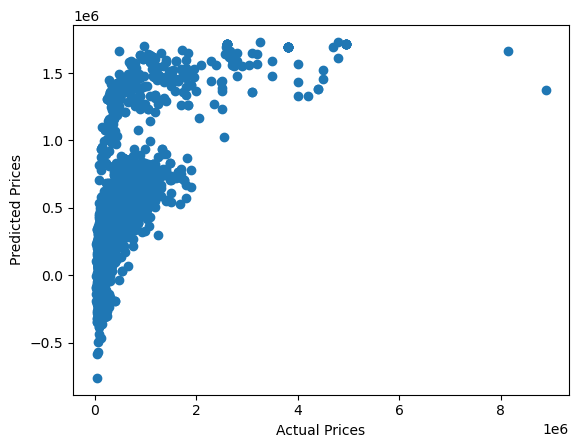

In [30]:
#visualising the actual and predicted prices 
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

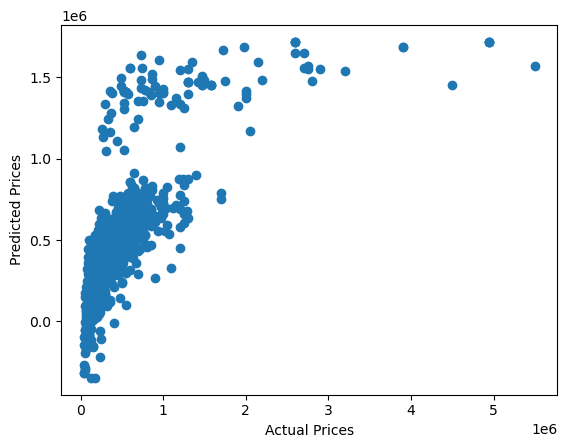

In [31]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

**Saving the Model**

In [37]:
import pickle

In [38]:
filename='lin_reg_model.pkl'
pickle.dump(car_price_model,open(filename,'wb'))